In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA

In [3]:
adidas = pd.read_excel("Downloads\Adidas US Sales Datasets.xlsx")
adidas.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.0,0.50,In-store
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.0,0.30,In-store
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.0,0.35,In-store
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.0,0.35,In-store
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.0,0.30,In-store


In [5]:
#checking the shape of the dataframe
adidas.shape

(9648, 13)

In [6]:
#Checking for Duplicate Values:
adidas.duplicated().sum()

0

In [8]:
adidas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Retailer          9648 non-null   object        
 1   Retailer ID       9648 non-null   int64         
 2   Invoice Date      9648 non-null   datetime64[ns]
 3   Region            9648 non-null   object        
 4   State             9648 non-null   object        
 5   City              9648 non-null   object        
 6   Product           9648 non-null   object        
 7   Price per Unit    9648 non-null   float64       
 8   Units Sold        9648 non-null   int64         
 9   Total Sales       9648 non-null   float64       
 10  Operating Profit  9648 non-null   float64       
 11  Operating Margin  9648 non-null   float64       
 12  Sales Method      9648 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(6)
memory usage: 980.0+ KB


In [9]:
adidas.isnull().sum()

Retailer            0
Retailer ID         0
Invoice Date        0
Region              0
State               0
City                0
Product             0
Price per Unit      0
Units Sold          0
Total Sales         0
Operating Profit    0
Operating Margin    0
Sales Method        0
dtype: int64

In [10]:
adidas.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.0,0.50,In-store
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.0,0.30,In-store
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.0,0.35,In-store
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.0,0.35,In-store
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.0,0.30,In-store


In [11]:
adidas.tail()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
9643,Foot Locker,1185732,2021-01-24,Northeast,New Hampshire,Manchester,Men's Apparel,50.0,64,3200.0,896.00,0.28,Outlet
9644,Foot Locker,1185732,2021-01-24,Northeast,New Hampshire,Manchester,Women's Apparel,41.0,105,4305.0,1377.60,0.32,Outlet
9645,Foot Locker,1185732,2021-02-22,Northeast,New Hampshire,Manchester,Men's Street Footwear,41.0,184,7544.0,2791.28,0.37,Outlet
9646,Foot Locker,1185732,2021-02-22,Northeast,New Hampshire,Manchester,Men's Athletic Footwear,42.0,70,2940.0,1234.80,0.42,Outlet
9647,Foot Locker,1185732,2021-02-22,Northeast,New Hampshire,Manchester,Women's Street Footwear,29.0,83,2407.0,649.89,0.27,Outlet


In [ ]:
adidas['Total Sales'] = adidas['Total Sales'].str.replace(r'[])

In [12]:
## Remove non-numeric characters from the columns
adidas['Total Sales'] = adidas['Total Sales'].astype(str).str.replace(r'[$, ]', '', regex=True).astype(float)
adidas['Units Sold'] = adidas['Units Sold'].astype(str).str.replace(r'[$, ]', '', regex=True).astype(float)
adidas['Operating Profit'] = adidas['Operating Profit'].astype(str).str.replace(r'[$, ]', '', regex=True).astype(float)
adidas['Operating Margin'] = adidas['Operating Margin'].astype(str).str.replace(r'[$, ]', '', regex=True).astype(float)

In [14]:
# Convert Invoice Date to DateTime Object.
adidas['Invoice Date'] = pd.to_datetime(adidas['Invoice Date'])

In [15]:
# Extract Year and Month from Invoice Date
adidas['year'] = adidas['Invoice Date'].dt.year
adidas['Month'] = adidas['Invoice Date'].dt.month

1. Sales Performance Analysis: 
Which products are excelling in sales, and which are underperforming?

In [16]:
#find out the total revenue
tot_rev = adidas['Total Sales'].sum()
tot_rev

899902125.0

In [19]:

# Aggregating total sales and units sold for each product
product_sales = adidas.groupby('Product').agg({'Total Sales': 'sum', 'Units Sold': 'sum'}).reset_index()

# Sorting products by total sales in descending order to identify top-performing products
top_performing_products = product_sales.sort_values(by='Total Sales', ascending=False).head()

# Displaying the results
print("Top-Performing Products:")
top_performing_products


Top-Performing Products:


,Product,Total Sales,Units Sold
2,Men's Street Footwear,208826244.0,593320.0
3,Women's Apparel,179038860.0,433827.0
1,Men's Athletic Footwear,153673680.0,435526.0
5,Women's Street Footwear,128002813.0,392269.0
0,Men's Apparel,123728632.0,306683.0


In [ ]:
## Sorting products by total sales in ascending order to identify underperforming products
underperforming_products = product_sales.sort_values(by='Total Sales', ascending=True).head()

print("\nUnderperforming Products:")
underperforming_products

In [ ]:
#Insights: Men's Street Footware are the highest sold products.

# 2. Regional Market Analysis: Which stores are experiencing strong sales, and which ones are lagging?

In [22]:
adidas.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,year,Month
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200.0,600000.0,300000.0,0.50,In-store,2020,1
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000.0,500000.0,150000.0,0.30,In-store,2020,1
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000.0,400000.0,140000.0,0.35,In-store,2020,1
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850.0,382500.0,133875.0,0.35,In-store,2020,1
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900.0,540000.0,162000.0,0.30,In-store,2020,1


In [23]:
#Calculate ‘YOY’ profit
adidas['YOY Profit'] = adidas['Operating Profit'].pct_change(periods=1) * 100
print(adidas)

         Retailer  Retailer ID Invoice Date     Region          State  \
0     Foot Locker      1185732   2020-01-01  Northeast       New York   
1     Foot Locker      1185732   2020-01-02  Northeast       New York   
2     Foot Locker      1185732   2020-01-03  Northeast       New York   
3     Foot Locker      1185732   2020-01-04  Northeast       New York   
4     Foot Locker      1185732   2020-01-05  Northeast       New York   
...           ...          ...          ...        ...            ...   
9643  Foot Locker      1185732   2021-01-24  Northeast  New Hampshire   
9644  Foot Locker      1185732   2021-01-24  Northeast  New Hampshire   
9645  Foot Locker      1185732   2021-02-22  Northeast  New Hampshire   
9646  Foot Locker      1185732   2021-02-22  Northeast  New Hampshire   
9647  Foot Locker      1185732   2021-02-22  Northeast  New Hampshire   

            City                    Product  Price per Unit  Units Sold  \
0       New York      Men's Street Footwear     

In [24]:
#Calculate average revenue
total_revenue = adidas['Total Sales'].sum()
number_of_periods = adidas.shape[0]
average_revenue = total_revenue / number_of_periods

print(f"Average Revenue: {average_revenue}")

Average Revenue: 93273.4375


In [26]:
#Calculate revenue for each year
revenue_per_year = adidas.groupby('year')['Total Sales'].sum()
print(revenue_per_year)

year
2020    182080675.0
2021    717821450.0
Name: Total Sales, dtype: float64


In [30]:
#Calculate revenue for same period last year
revenue_last_year = []
for index, row in adidas.iterrows():
    same_period_last_year = adidas[(adidas['year'] == row['year'] - 1) & (adidas['Month'] == row['Month'])]
    revenue_last_year.append(same_period_last_year['Total Sales'].sum())

adidas['Revenue Last year'] = revenue_last_year

print(adidas)

         Retailer  Retailer ID Invoice Date     Region          State  \
0     Foot Locker      1185732   2020-01-01  Northeast       New York   
1     Foot Locker      1185732   2020-01-02  Northeast       New York   
2     Foot Locker      1185732   2020-01-03  Northeast       New York   
3     Foot Locker      1185732   2020-01-04  Northeast       New York   
4     Foot Locker      1185732   2020-01-05  Northeast       New York   
...           ...          ...          ...        ...            ...   
9643  Foot Locker      1185732   2021-01-24  Northeast  New Hampshire   
9644  Foot Locker      1185732   2021-01-24  Northeast  New Hampshire   
9645  Foot Locker      1185732   2021-02-22  Northeast  New Hampshire   
9646  Foot Locker      1185732   2021-02-22  Northeast  New Hampshire   
9647  Foot Locker      1185732   2021-02-22  Northeast  New Hampshire   

            City                    Product  Price per Unit  Units Sold  \
0       New York      Men's Street Footwear     

In [31]:
# Calculate average operating margin
average_operating_margin = adidas['Operating Margin'].mean()
average_operating_margin

0.422991293532333

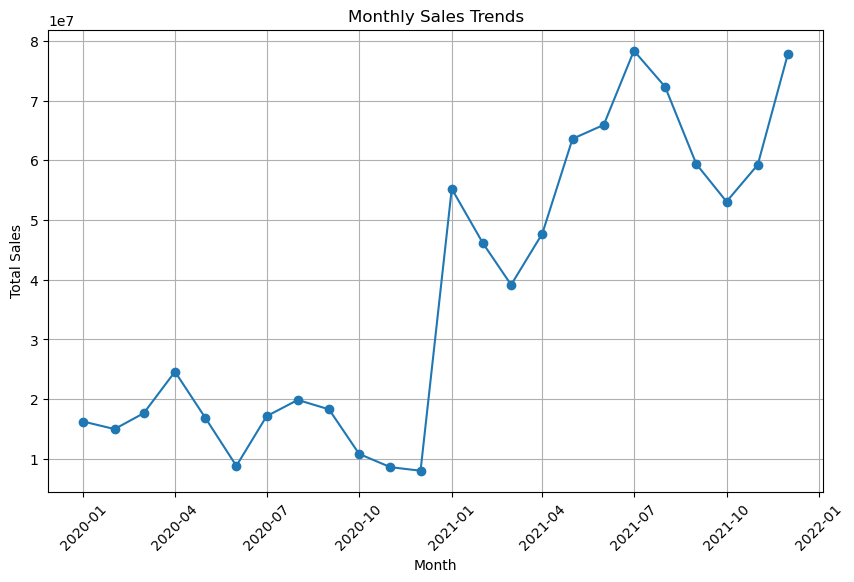

In [33]:
# Group by month and calculate total sales for each month
monthly_sales = adidas.groupby(adidas['Invoice Date'].dt.to_period('M'))['Total Sales'].sum()

# Convert the index (which is of type 'Period') to DateTime objects
monthly_sales.index = monthly_sales.index.to_timestamp()

# Plot the sales trends over time
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Monthly Sales Trends')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [34]:
# Analyze the sales trends
diff = monthly_sales.diff()  # Calculate the difference between consecutive months
seasonality_threshold = 10000

# Check for seasonality
if (diff > seasonality_threshold).any():
    print("\nThese sales follow a seasonality.")
else:
    print("These sales do not follow a seasonality.")

# Check for trend
if (diff > 0).all() or (diff < 0).all():
    print("These sales follow a trend.")
else:
    print("\nThese sales do not follow a trend.")


These sales follow a seasonality.

These sales do not follow a trend.
